<a href="https://colab.research.google.com/github/soumilbaldota/MNIST/blob/master/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
!pip install tensorflow_datasets
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset,metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset , test_dataset = dataset['train'] , dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incomplete37PHEX/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incomplete37PHEX/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.0. Subsequent calls will reuse this data.


In [3]:
class_names=['tshirt','trouser','pullover','dress','coat',
             'sandal','shirt','sneaker','bag','ankle boot']
metadata.splits['train'].num_examples


60000

In [4]:
metadata.splits['test'].num_examples

10000

In [5]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels
train_dataset=train_dataset.map(normalize)
test_dataset=test_dataset.map(normalize)
train_dataset=train_dataset.cache()
test_dataset=test_dataset.cache()


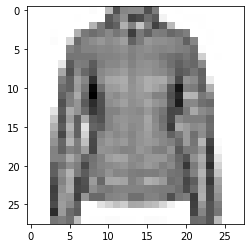

In [6]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))
plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.show()

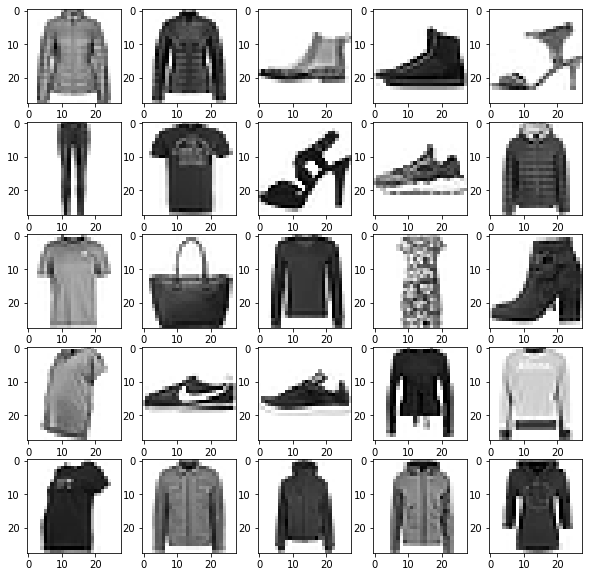

In [7]:
plt.figure(figsize=(10,10))
i=0
for (image, label) in test_dataset.take(25):
  image=image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.imshow(image,cmap=plt.cm.binary)
  i+=1
plt.show()

In [8]:
l0=tf.keras.layers.Flatten(input_shape=(28,28,1))
l1=tf.keras.layers.Dense(128,activation=tf.nn.relu)
l2=tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)
model=tf.keras.Sequential([l0,l1,l2])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [10]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(60000).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [11]:
model.fit(train_dataset,epochs=5,shuffle=True,steps_per_epoch=math.ceil(60000/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4963 - accuracy: 0.8259
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3741 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3346 - accuracy: 0.8783
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3065 - accuracy: 0.8878
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2944 - accuracy: 0.8909


In [13]:
test_loss,test_accuracy =model.evaluate(test_dataset,steps=math.ceil(10000/32))
print(test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3475 - accuracy: 0.8774
0.8773999810218811


In [14]:
for t,l in test_dataset.take(1):
  break
t=t.numpy()
l=l.numpy()
predictions=model.predict(t)

In [16]:
predictions.shape

(32, 10)

In [17]:
predictions[0]

array([3.0975367e-05, 9.3004037e-06, 1.2929442e-02, 1.0187342e-07,
       9.7396457e-01, 2.0501403e-09, 1.3031568e-02, 3.0380822e-09,
       3.3971315e-05, 2.1226038e-08], dtype=float32)

In [18]:
np.argmax(predictions[0])

4

In [20]:
l[0]

4

In [23]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

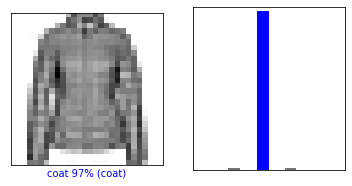

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, l,t)
plt.subplot(1,2,2)
plot_value_array(i, predictions,l)

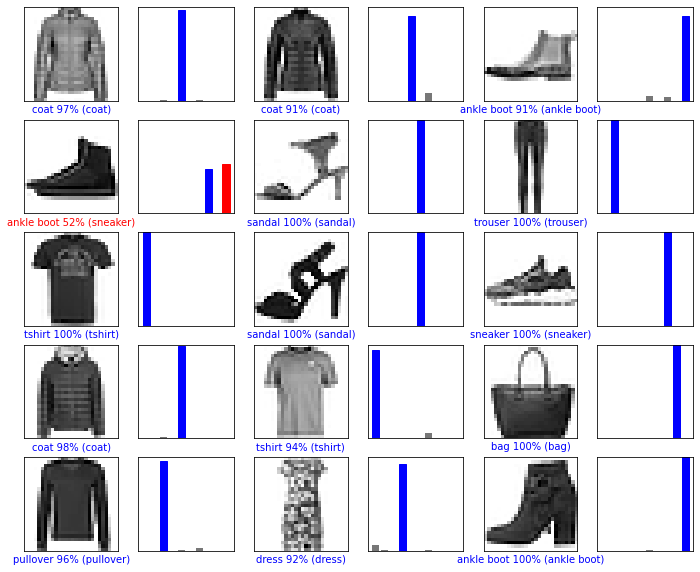

In [28]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, l,t)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, l)

In [31]:
img = t[0]

print(img.shape)

(28, 28, 1)


In [32]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [35]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.0975367e-05 9.3003937e-06 1.2929442e-02 1.0187362e-07 9.7396457e-01
  2.0501403e-09 1.3031568e-02 3.0380765e-09 3.3971286e-05 2.1225997e-08]]
